In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

df = pd.read_csv(r"~\Aov_analysis\data\winter_challange_data.csv")

# Question 1:

In [7]:
df.head(n=10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [10]:
df.duplicated().sum()

0

In [5]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

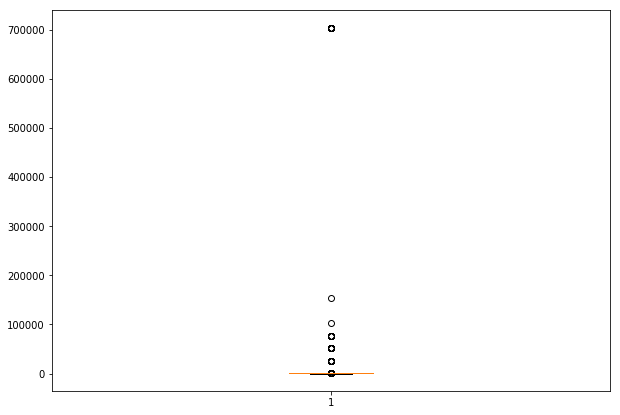

In [21]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df.order_amount)
plt.show()

**Anlysis findings:**
- The data records sneaker sales for 30 days in Mat 2017
- There are 5000 records
- The mean amount is 3145.13 (which is the AOV that was orginially found)
- There are no duplicates

It seems that the naive calculation for AOV comes from calculating the mean for order_amounts. 

However, as seen in the box and whisker plot it is evident that there are outliers that pull that average higher which causes this out come. To gauge a better understanding about AOV calculations, referred to [Shopify Blog](https://www.shopify.com/blog/average-order-value) which explains that the AOV is used for merchants to understand a customer's threshold and use it as a benchmark to make better business decisions. If we are making the assumption that all shops are selling the same model of sneaker at a competitive prices, we are trying to find the average a customer will spend on this sneaker across 100 different shops. 

**Therefore, the best way to calculate the AOV for this data set is to find the average of the AOV of each shop.**


In [26]:
order_amount_per_shop = df.groupby(['shop_id'])['order_amount'].agg('sum')
num_order_per_shop = df.groupby(['shop_id'])['total_items'].agg('sum')
order_amount_per_shop.name = "total_order_amount"
num_order_per_shop.name = "total_orders"
df_aov = pd.concat([order_amount_per_shop, num_order_per_shop], axis=1)
aov_by_shop = df_aov['total_order_amount']/df_aov['total_orders'] 
aov_by_shop.name = "aov"
df_aov = pd.concat([order_amount_per_shop, num_order_per_shop, aov_by_shop], axis=1)
df_aov.head()

,total_order_amount,total_orders,aov
shop_id,,,
1,13588,86,158.0
2,9588,102,94.0
3,14652,99,148.0
4,13184,103,128.0
5,13064,92,142.0


In [27]:
df_aov.aov.describe()

count      100.000000
mean       407.990000
std       2557.462906
min         90.000000
25%        132.750000
50%        153.000000
75%        168.250000
max      25725.000000
Name: aov, dtype: float64

The new AOV is $407.99 which is still higher then expected. However, if you look at the max which is 25725, which is show some outliers. 

We must dig in some more to clean the data some. This might include removing any data that might indicate suspicious activities. This was also shown in the box and whisker plot above where there was a point plotted at $704000.

In [29]:
df.sort_values(by=['order_amount'], ascending= False).head(n=20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


In [30]:
group = df.groupby(['order_amount']).size().reset_index(name='counts').sort_values(by='order_amount', ascending=False)
group.head(10)

,order_amount,counts
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


In [31]:
df_42 = df[df['shop_id'] == 42]
df_42.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,51.000000,51.0,51.000000,51.000000,51.000000
mean,2441.921569,42.0,758.588235,235101.490196,667.901961
std,1484.456801,0.0,125.993044,334860.641587,951.308641
min,16.000000,42.0,607.000000,352.000000,1.000000
25%,1366.500000,42.0,607.000000,352.000000,1.000000
50%,2154.000000,42.0,770.000000,704.000000,2.000000
75%,3801.000000,42.0,863.500000,704000.000000,2000.000000
max,4883.000000,42.0,975.000000,704000.000000,2000.000000


It seems that shop 42 has some of the highest purchases made. However, a purchase of $704000 of 2000 items is not unreasonable since it would be about $352 per-item. Is this high, possibly, but it does not seem to be fraud.

Next step would be to see this is common among other shops

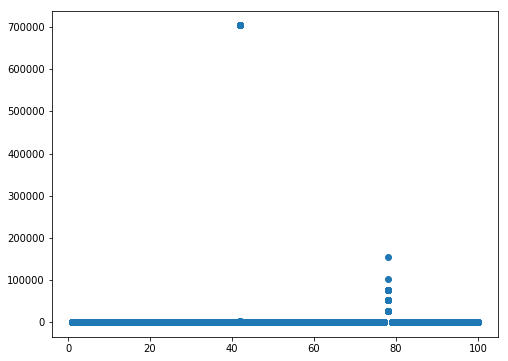

In [37]:
plt.figure().set_size_inches(8, 6) 
plt.scatter(df['shop_id'], df['order_amount'])
plt.show()

In [38]:
df_78 = df[df['shop_id'] == 78]
df_78.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,46.000000,46.0,46.000000,46.000000,46.000000
mean,2663.021739,78.0,867.739130,49213.043478,1.913043
std,1338.520020,0.0,81.314871,26472.227449,1.029047
min,161.000000,78.0,707.000000,25725.000000,1.000000
25%,1428.250000,78.0,812.500000,25725.000000,1.000000
50%,2796.500000,78.0,866.500000,51450.000000,2.000000
75%,3720.250000,78.0,935.750000,51450.000000,2.000000
max,4919.000000,78.0,997.000000,154350.000000,6.000000


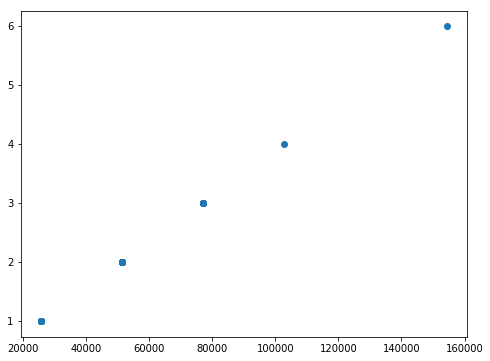

In [40]:
plt.figure().set_size_inches(8, 6) 
plt.scatter(df_78['order_amount'], df_78['total_items'])
plt.show()

# Question 2: 

<b>Question a</b> 
<br>
<b>Query</b> 
<br>
	SELECT count(*) <br>
    FROM Orders as o  <br>
    JOIN Shippers as s on s.ShipperId = o.ShipperId  <br>
    WHERE s.ShipperName  = "Speedy Express"  <br>
	
<b>Result</b> 
<br>
	54
<br>

<b>Question b</b> 
<br>
<b>Query</b> 
<br>
    SELECT e.LastName  <br>
    FROM Orders as o  <br>
    JOIN Employees as e on o.EmployeeID = e.EmployeeID  <br>
    GROUP BY e.EmployeeID  <br>
    ORDER BY count(o.OrderID) desc  <br>
    Limit 1;
    
<b>Result</b> 
<br>
    Peacock
<br>

<b>Question c</b> 
<br>
<b>Query</b> 
<br>
    SELECT p.ProductName <br>
    FROM Orders as o <br>
    JOIN OrderDetails as od on o.OrderID = od.OrderId <br>
    JOIN Customers as c on c.CustomerID = o.CustomerID <br>
    JOIN Products as p on p.ProductID = od.ProductID <br>
    WHERE Country = 'Germany' <br>
    Group by p.ProductID <br>
    Order by sum(od.quantity) desc <br>
    Limit 1;
    
<b>Result</b> 
<br>
    Boston Crab Meat

